<a href="https://colab.research.google.com/github/sohdacafe/Python_tips/blob/main/nlp_20_knocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# MeCabをインストールを行う準備
!apt install aptitude 
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
aptitude is already the newest version (0.8.10-6ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
mecab is already installed at the requested version (0.996-5)
libmecab-dev is already installed at the requested version (0.996-5)
mecab-ipadic-utf8 is already installed at the requested version (2.7.0-20070801+main-1)
git is already installed at the requested version (1:2.17.1-1ubuntu0.9)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.16)
xz-utils is already installed at the requested version (5.2.2-1.3)
file is already installed at the requested version (1:5.32-2ubuntu0.4)
mecab is already installed at the requested version (0.996-5)
libmecab-dev is already installed at the requested version (0.996-5)
mecab-ipadic-utf8 is already installed at the requested version (2.7.0-20070801+ma

In [33]:
import MeCab
from glob import glob

In [34]:
# ファイル書き込み作成
txt = 'こんちは'
with open('output_7.txt', 'x') as f:
  f.write(txt)

In [35]:
# cd ..
filepaths = glob('*.txt')
filepaths
filepaths[2]

'output_7.txt'

In [36]:
filepath = filepaths[1]
with open(filepath, 'r', encoding='shift-jis') as f:
  txt = f.read()
txt

'縺薙ｓ縺｡縺ｯ'

In [37]:
# MeCabでの形態素解析
tagger = MeCab.Tagger()
parsed_txt = tagger.parse(txt) #parseは切り分ける
parsed_txt # print(t_text)では改行シーケンスなどを読み込んで出力している

'縺薙\t名詞,一般,*,*,*,*,*\nｓ\t記号,アルファベット,*,*,*,*,ｓ,エス,エス\n縺\t名詞,一般,*,*,*,*,*\n｡\t名詞,サ変接続,*,*,*,*,*\n縺\t名詞,一般,*,*,*,*,*\nｯ\t名詞,一般,*,*,*,*,*\nEOS\n'

In [38]:
# Chasenでの形態素解析
tagger = MeCab.Tagger('-Ochasen') #Output chasen形式 
print(tagger.parse(txt))

縺薙	縺薙	縺薙	名詞-一般		
ｓ	エス	ｓ	記号-アルファベット		
縺	縺	縺	名詞-一般		
｡	｡	｡	名詞-サ変接続		
縺	縺	縺	名詞-一般		
ｯ	ｯ	ｯ	名詞-一般		
EOS



In [39]:
# 分かち書き
tagger = MeCab.Tagger('-Owakati')  
print(tagger.parse(txt))

縺薙 ｓ 縺 ｡ 縺 ｯ 



In [40]:
# カタカナ変換出力
tagger = MeCab.Tagger('-Oyomi')  
print(tagger.parse(txt))

縺薙エス縺｡縺ｯ



In [41]:
# 品詞の分類
elements = parsed_txt.split('\n')[:-2] # \nで改行されているので、そこで分割。最終2行は不要なので、除く
elements[0:10]

['縺薙\t名詞,一般,*,*,*,*,*',
 'ｓ\t記号,アルファベット,*,*,*,*,ｓ,エス,エス',
 '縺\t名詞,一般,*,*,*,*,*',
 '｡\t名詞,サ変接続,*,*,*,*,*',
 '縺\t名詞,一般,*,*,*,*,*',
 'ｯ\t名詞,一般,*,*,*,*,*']

In [42]:
element = elements[0]
parts = element.split(',') # elementsから1行抜き出し、カンマ区切りに分割
surface_pos = parts[0] # 単語と品詞を取ってくる
pos1 = parts[1] # 品詞を取ってくる
base = parts[-3] # 原形を取ってくる

In [43]:
surface, pos = surface_pos.split('\t') # タブ区切りでsurfase_posのリストを分割([0], [1]に分割)

In [44]:
surface

'縺薙'

In [45]:
results = []

for element in elements:
    parts = element.split(',')
    surface_pos, pos1, base = parts[0], parts[1], parts[-3]
    surface, pos = surface_pos.split('\t')
    results.append(dict(表層形=surface, 基本形=base, 品詞=pos, 品詞1=pos1)) # dict形式で格納(keyとvalueを'='で結びつける)

In [46]:
results[0:10]

[{'品詞': '名詞', '品詞1': '一般', '基本形': '*', '表層形': '縺薙'},
 {'品詞': '記号', '品詞1': 'アルファベット', '基本形': 'ｓ', '表層形': 'ｓ'},
 {'品詞': '名詞', '品詞1': '一般', '基本形': '*', '表層形': '縺'},
 {'品詞': '名詞', '品詞1': 'サ変接続', '基本形': '*', '表層形': '｡'},
 {'品詞': '名詞', '品詞1': '一般', '基本形': '*', '表層形': '縺'},
 {'品詞': '名詞', '品詞1': '一般', '基本形': '*', '表層形': 'ｯ'}]

In [47]:
# 品詞の抽出
result = results[0]
result

{'品詞': '名詞', '品詞1': '一般', '基本形': '*', '表層形': '縺薙'}

In [12]:
# set型を用いて重複の無いように抽出(動詞)
surface_verbs = set()
for result in results:
    if result['品詞'] == '動詞':
        surface_verbs.add(result['表層形'])

surface_verbs

NameError: ignored

In [11]:
# set型を用いて重複の無いように抽出(基本形)
base_verbs = set()
for result in results:
    if result['品詞'] == '動詞':
        base_verbs.add(result['基本形'])

base_verbs

NameError: ignored

In [10]:
# 単語の頻出度の算出、辞書の作製
from collections import defaultdict
word_freq = defaultdict(int)

for result in results:
    if result['品詞'] != '記号':
        word_freq[result['基本形']] += 1 
word_freq

# 記号以外を追加
# defaultdictは初期のキーがなくても追加して作成してくれる

NameError: ignored

In [51]:
# matplotlibの日本語化
! pip install japanize_matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

In [52]:
# 単語の頻出順に並び替え

In [53]:
# リスト型に変換
word_freq.items()

dict_items([('*', 5)])

In [54]:
# 辞書型をリスト型に変換し、出現回数を基にソート
sorted_word_freq = sorted(word_freq.items(), key=lambda x:x[1], reverse=True)
# x0がリストの左、x1がリストの右のイメージ。x[1]を基準にソートする
sorted_word_freq[0:10]

[('*', 5)]

In [55]:
# 内包表記で取り出し
keys = [_[0] for _ in sorted_word_freq[0:10]]
values = [_[1] for _ in sorted_word_freq[0:10]]
keys

['*']

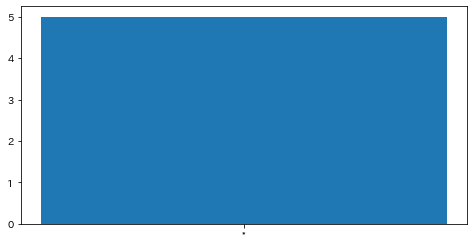

In [56]:
plt.figure(figsize=(8,4))
plt.bar(keys, values)
plt.show()

In [57]:
# 出現頻度、出現回数をヒストグラム化

Text(0, 0.5, '単語の種類')

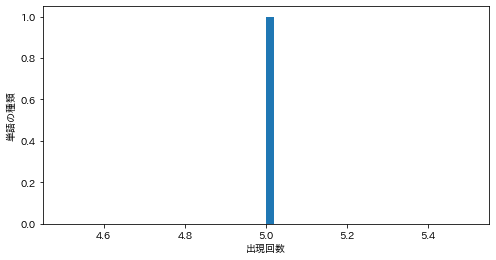

In [58]:
n_values = word_freq.values()
plt.figure(figsize=(8,4))
plt.hist(n_values, bins=50)
plt.xlabel('出現回数')
plt.ylabel('単語の種類')

In [59]:
# N-gram(文字単位)
# N-gramはある単位で文字または単語単位でまとめたもの。2つであればbi-gram、3つであればtri-gram

In [60]:
text2 = '今日は晴れです。'
text2

'今日は晴れです。'

In [61]:
# bi-gram
for i in range(len(text2)-1):
    print(text2[i:i+2])

今日
日は
は晴
晴れ
れで
です
す。


In [62]:
# tri-gram
for i in range(len(text2)-2):
    print(text2[i:i+3])

今日は
日は晴
は晴れ
晴れで
れです
です。


In [63]:
# N-gram(単語単位)

In [64]:
text3 = 'Pythonではじめる機械学習を読む。'
text3

'Pythonではじめる機械学習を読む。'

In [65]:
tagger = MeCab.Tagger('-Owakati')
tagger.parse(text3)

'Python ではじめる 機械 学習 を 読む 。 \n'

In [66]:
# 半角スペースで分ける、最後の\nを取らない
words = tagger.parse(text3).split(' ')[:-1]
words

['Python', 'ではじめる', '機械', '学習', 'を', '読む', '。']

In [67]:
words[0]

'Python'

In [68]:
for i in range(len(words)-1):
    print(''.join(words[i:i+2]))
# 指定した文字でjoinで結合(何も指定しなければそのまま結合)

Pythonではじめる
ではじめる機械
機械学習
学習を
を読む
読む。


In [69]:
for i in range(len(words)-2):
    print(''.join(words[i:i+3]))

Pythonではじめる機械
ではじめる機械学習
機械学習を
学習を読む
を読む。


In [70]:
# N-gramの関数化
text4 = 'こんにちは、Python機械学習へようこそ。'

In [71]:
# tri-gram(文字単位)
for i in range(len(text2)-2):
    print(text2[i:i+3])
# tri-gram(単語単位)
for i in range(len(words)-2):
    print(''.join(words[i:i+3]))

今日は
日は晴
は晴れ
晴れで
れです
です。
Pythonではじめる機械
ではじめる機械学習
機械学習を
学習を読む
を読む。


In [72]:
# tri-gramで数値3を定数に。-2はn-1に変更
n = 3
for i in range(len(text4)-n+1):
    print(text4[i:i+n])

# 内包表記
[words[i:i+n] for i in range(len(words)-n+1)]

こんに
んにち
にちは
ちは、
は、P
、Py
Pyt
yth
tho
hon
on機
n機械
機械学
械学習
学習へ
習へよ
へよう
ようこ
うこそ
こそ。


[['Python', 'ではじめる', '機械'],
 ['ではじめる', '機械', '学習'],
 ['機械', '学習', 'を'],
 ['学習', 'を', '読む'],
 ['を', '読む', '。']]

In [73]:
# 関数で定義
# 引数は基の文章といくつに分けるかの値
def ngram(text, n):
    return [text[i:i+n] for i in range(len(text)-n+1)]

In [74]:
text = 'こんにちは、Python機械学習へようこそ。'
words = tagger.parse(text).split(' ')[:-1]

In [75]:
ngram(text, 3)

['こんに',
 'んにち',
 'にちは',
 'ちは、',
 'は、P',
 '、Py',
 'Pyt',
 'yth',
 'tho',
 'hon',
 'on機',
 'n機械',
 '機械学',
 '械学習',
 '学習へ',
 '習へよ',
 'へよう',
 'ようこ',
 'うこそ',
 'こそ。']

In [76]:
ngram(words, 4)

[['こんにちは', '、', 'Python', '機械'],
 ['、', 'Python', '機械', '学習'],
 ['Python', '機械', '学習', 'へ'],
 ['機械', '学習', 'へ', 'ようこそ'],
 ['学習', 'へ', 'ようこそ', '。']]

In [77]:
# 単語ベクトル読み込み(google_newsの学習済み単語ベクトル(1000億単語から算出))
FILE_ID = "0B7XkCwpI5KDYNlNUTTlSS21pQmM"
FILE_NAME = "GoogleNews-vectors-negative300.bin.gz"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt

--2021-10-17 08:32:21--  https://docs.google.com/uc?export=download&confirm=veNb&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
Resolving docs.google.com (docs.google.com)... 209.85.200.138, 209.85.200.139, 209.85.200.102, ...
Connecting to docs.google.com (docs.google.com)|209.85.200.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-1c-docs.googleusercontent.com/docs/securesc/es06kh8aqs50qa083akmjif9eq1q7utd/0q630npajlrpvb0qhgbc694f8hki6e85/1634459475000/06848720943842814915/01601795175568016299Z/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download [following]
--2021-10-17 08:32:23--  https://doc-0k-1c-docs.googleusercontent.com/docs/securesc/es06kh8aqs50qa083akmjif9eq1q7utd/0q630npajlrpvb0qhgbc694f8hki6e85/1634459475000/06848720943842814915/01601795175568016299Z/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download
Resolving doc-0k-1c-docs.googleusercontent.com (doc-0k-1c-docs.googleusercontent.com)... 142.250.148.132, 2607:f8b0:4001:c54::84
Connecting to doc-0k-1c-

In [3]:
from gensim.models import KeyedVectors

In [4]:
# load_word2vec_formatは単語をベクトル変換するフォーマット
model = KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
# 本来は300個のarray型リストが出てくるが、大きすぎるため、先頭50を抜き出し
model['Python'][:50]
# 出てきた数値が1000億単語から機会が学習した単語のベクトル

In [ ]:
# cos類似度の比較

In [ ]:
# 単語ベクトルをsimilarityで類似度を比較計算できる。1に近ければ近いほど類似度が高い。
model.similarity('Japan', 'Japanese')

In [5]:
model.similarity('Japan', 'America')

0.39131382

In [ ]:
# 類似度のランキング(Japanと類似度の高い10単語を選出)
rank = model.most_similar('Python', topn=10)
rank

In [ ]:
# 単語ベクトルの演算('king' - 'male' + 'female')
# model['king'] - model['male'] + model['female'] (ベクトルの演算で計算できる)
model.most_similar(positive=['King', 'female'], negative=['male'], topn=10)

In [ ]:
# k-meansでクラスタリング。単語ベクトルモデルから1000語抽出、クラスタリング

In [15]:
max_vocab = 1000
vocab = list(model.wv.vocab.keys())[:max_vocab]
# wv(word2vecの略)、リスト化して単語を1000個取ってくる
vectors = [model.wv[word] for word in vocab]
# 内包表記、ベクトルを取ってくる


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [16]:
from sklearn.cluster import KMeans

# クラスタリングのグループ数(分ける数)
n_clusters = 100
kmeans_model = KMeans(n_clusters=n_clusters, verbose=1, random_state=42, n_jobs=-1)
kmeans_model.fit(vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=1)

In [18]:
from collections import defaultdict
cluster_labels = kmeans_model.labels_
# クラスター分けした番号を与えている。
cluster_to_words = defaultdict(list)
# defaultdict初期化されている辞書型リスト
for cluster_id, word in zip(cluster_labels, vocab):
    cluster_to_words[cluster_id].append(word)
# wordとクラスターidをセットで格納する

In [21]:
for words in cluster_to_words.values():
    print(words[:10])
# グループ分けされた単語が出てくる。(単語ベクトルでクラスタリングされているので、行で似通った単語が出てくる)

['</s>', 'in', 'with', 'the', 'from', 'by', 'which', 'while', 'including', 'between']
['for', 'also', 'new', 'work', 'help', 'part', 'use', 'used', 'money', 'support']
['that', 'is', 'was', 'as', 'be', 'have', 'has', 'this', 'or', 'but']
['on', 'up', 'out', 'over', 'into', 'back', 'off', 'through', 'down', 'under']
['##', '###', '1', '2', '3', '5', '4', '6', '7', '8']
['The', 'In', 'A', 'But', 'They', 'If', 'And', 'There', 'For', 'As']
['said', 'says', 'told', 'added', 'according', 'reported', 'saying', 'statement', 'Mr.', 'Mr']
['at', 'am', 'held', 'open', 'close', 'near', 'Center', 'visit', 'St.', 'opening']
['not', 'it', 'they', 'do', 'there', 'just', 'what', 'so', 'like', 'if']
['are', 'their', 'were', 'all', 'other', 'some', 'most', 'many', 'those', 'such']
['I', 'we', 'you', 'We', 'our', 'your', "'re", "'ve", 'You', "'m"]
['he', 'his', 'He', 'her', 'she', 'him', 'my', 'She', 'career', 'His']
['will', 'would', 'can', 'could', 'should', 'may', 'does', 'want', 'need', 'expected']
['

In [ ]:
# t-SNEでの可視化(次元削減手法のt-SNEを使用して単語ベクトルのベクトル空間を可視化)